In [2]:
import matplotlib.pyplot as plt
from dynamic_sound._core._environment import *

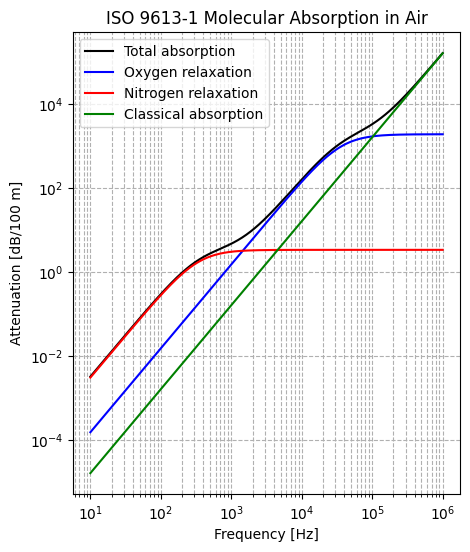

----------------------------------
Temperature: -20 °C
Humidity (%) |     10.00 |     20.00 |     30.00 |     40.00 |     50.00 |     60.00 |     70.00 |     80.00 |     90.00 |    100.00 |
          50 |  5.87e-01 |  4.17e-01 |  2.84e-01 |  2.10e-01 |  1.67e-01 |  1.42e-01 |  1.25e-01 |  1.13e-01 |  1.05e-01 |  9.89e-02 |
          63 |  7.55e-01 |  6.01e-01 |  4.20e-01 |  3.07e-01 |  2.41e-01 |  1.99e-01 |  1.73e-01 |  1.55e-01 |  1.42e-01 |  1.33e-01 |
          80 |  9.29e-01 |  8.55e-01 |  6.27e-01 |  4.61e-01 |  3.56e-01 |  2.90e-01 |  2.46e-01 |  2.16e-01 |  1.96e-01 |  1.80e-01 |
         100 |  1.08e+00 |  1.15e+00 |  9.02e-01 |  6.75e-01 |  5.21e-01 |  4.19e-01 |  3.50e-01 |  3.03e-01 |  2.69e-01 |  2.45e-01 |
         125 |  1.20e+00 |  1.48e+00 |  1.27e+00 |  9.86e-01 |  7.67e-01 |  6.14e-01 |  5.08e-01 |  4.33e-01 |  3.80e-01 |  3.40e-01 |
         160 |  1.31e+00 |  1.85e+00 |  1.79e+00 |  1.48e+00 |  1.17e+00 |  9.46e-01 |  7.79e-01 |  6.59e-01 |  5.70e-01 |  5.03e-01 |


In [ ]:
temp = [-20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
freq = np.array([50, 63, 80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000])
humidity = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


f = np.logspace(1, 6, 500)
T = 20+273.15
h_rel = 50
pa = 101.325
h = molar_concentration_water_vapour(relative_humidity=h_rel, saturation_pressure=saturation_pressure(temperature=T), pressure=pa)
alpha_coeff = air_absorption_coefficients(f=f, T=T, pa=pa, hr=h_rel)
alpha_O = oxygen_relaxation_contribution(frequency=f, temperature=T, pressure=pa, h=h)
alpha_N = nitrogen_relaxation_contribution(frequency=f, pressure=pa, temperature=T, h=h)
alpha_C = classical_contribution(frequency=f, pressure=pa, temperature=T)
plt.figure(figsize=(5,6))
plt.loglog(f, alpha_coeff * 1000, 'k', label="Total absorption")
plt.loglog(f, alpha_O * 1000, 'b', label="Oxygen relaxation")
plt.loglog(f, alpha_N * 1000, 'r', label="Nitrogen relaxation")
plt.loglog(f, alpha_C * 1000, 'g', label="Classical absorption")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Attenuation [dB/100 m]")
plt.title("ISO 9613-1 Molecular Absorption in Air")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

distance = 1000
alpha_coeff = 10**(-alpha_coeff * distance / 20)

for temp_i in temp:
    print("----------------------------------")
    print(f"Temperature: {temp_i} °C")
    temp_i = temp_i+273.15
    print("Humidity (%) |", end="")

    for hum_i in humidity:
        print(f"{hum_i:10.2f} |", end="")
         
    for freq_i in freq:
        print(f"\n{freq_i:12.0f} |", end="")
        for hum_i in humidity:
            val = air_absorption_coefficients(f=freq_i, T=temp_i, pa=101.325, hr=hum_i)
            print(f"{val*1000:10.2e} |", end="")
    
    print()
